<a href="https://colab.research.google.com/github/olinyoder2534/StatisticsSimulations/blob/main/CLT_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

Connect to API

In [ ]:
response = requests.get('https://randomuser.me/api')

Single Person Reponse

In [ ]:
print(response.status_code)
print(response.json())

200
{'results': [{'gender': 'female', 'name': {'title': 'Miss', 'first': 'Elisa', 'last': 'Núñez'}, 'location': {'street': {'number': 665, 'name': 'Calle de Alberto Aguilera'}, 'city': 'Arrecife', 'state': 'Castilla y León', 'country': 'Spain', 'postcode': 69968, 'coordinates': {'latitude': '-37.7200', 'longitude': '141.1159'}, 'timezone': {'offset': '+6:00', 'description': 'Almaty, Dhaka, Colombo'}}, 'email': 'elisa.nunez@example.com', 'login': {'uuid': '4a3c1415-a83e-4098-983a-ae20886816a0', 'username': 'redmouse942', 'password': 'camille', 'salt': 'Ho6cJILG', 'md5': '00e5c26b5817f901c57dc0f0f7f07451', 'sha1': '33d631c885e9c62a215a8fe123cdff81820fec04', 'sha256': '1103be9bb6469fd33d1f9ab533fb15fea1d5d246cbe884f5c0f08e646261afbe'}, 'dob': {'date': '1953-08-21T06:15:13.962Z', 'age': 70}, 'registered': {'date': '2003-06-16T16:49:28.890Z', 'age': 20}, 'phone': '954-504-608', 'cell': '673-352-173', 'id': {'name': 'DNI', 'value': '98942213-T'}, 'picture': {'large': 'https://randomuser.me/a

In [ ]:
#person information
gender = response.json()['results'][0]['gender']
gender

first_name = response.json()['results'][0]['name']['first']
first_name

last_name = response.json()['results'][0]['name']['last']
last_name

full_name = print('{} {}'.format(first_name, last_name))

Elisa Núñez


Responses for 50 People

In [ ]:
#50 people
data = []

for i in range(100):
    responses = requests.get('https://randomuser.me/api')

    if responses.status_code == 200:
        individual = responses.json()['results'][0]
        data.append({
            'name': f"{individual['name']['first']} {individual['name']['last']}",
            'gender': individual['gender'],
            'age': f"{individual['dob']['age']}",
            'email': individual['email'],
            'phone': individual['phone'],
            'location': f"{individual['location']['city']}, {individual['location']['country']}"
        })
    else:
        print("Request failed with status code {}".format(responses.status_code))

In [ ]:
#Basic exploration/cleaning
type(data)

list

In [ ]:
data = pd.DataFrame(data)
data.head(3)

,name,gender,age,email,phone,location
0,Francisco Carrasco,male,24,francisco.carrasco@example.com,938-278-857,"Valladolid, Spain"
1,Christer Bøhn,male,79,christer.bohn@example.com,54893224,"Bø, Norway"
2,Maureen Lopez,female,71,maureen.lopez@example.com,02-8517-6338,"Geraldton, Australia"


In [ ]:
data.dtypes

name        object
gender      object
age         object
email       object
phone       object
location    object
dtype: object

In [ ]:
np.unique(data['gender'])

array(['female', 'male'], dtype=object)

In [ ]:
data['name'] = data['name'].astype(str)
data['gender'] = data['gender'].astype('category')
data['age'] = data['age'].astype(int)

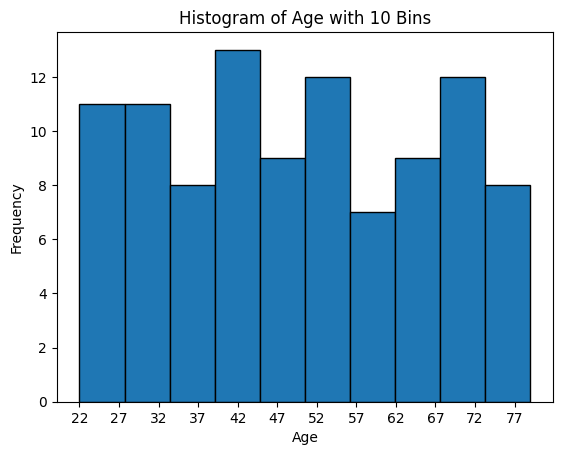

In [ ]:
plt.hist(data['age'], bins=10, edgecolor='black')

plt.xticks(range(min(data['age']), max(data['age']) + 1, 5))

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with 10 Bins')

plt.show()

In [ ]:
data['gender'].value_counts()

female    51
male      49
Name: gender, dtype: int64

In [ ]:
statistics.mean(data['age'])

52.03

In [ ]:
count = 0

for gender in data['gender']:
    if gender == 'male':
        count += 1

count

49

Central Limit Theorem Example

In [ ]:
ages = []
countMales = []

for i in range(100):
    data2 = []

    for j in range(10):
        responses2 = requests.get('https://randomuser.me/api')

        if responses2.status_code == 200:
            individual2 = responses2.json()['results'][0]
            data2.append({
                'name': f"{individual2['name']['first']} {individual2['name']['last']}",
                'gender': individual2['gender'],
                'age': int(individual2['dob']['age']),
            })
        else:
            print("Request failed with status code {}".format(responses2.status_code))

    data2 = pd.DataFrame(data2)
    data2['gender'] = data2['gender'].astype('category')

    # Calculate mean age and count of males
    meanAge = data2['age'].mean()
    countMale = (data2['gender'] == 'male').sum()

    # Append results to lists
    ages.append(meanAge)
    countMales.append(countMale)

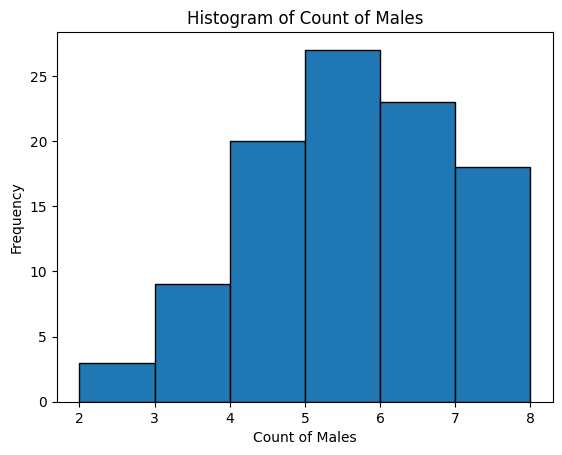

In [ ]:
plt.hist(countMales, bins=6, edgecolor='black')

plt.xlabel('Count of Males')
plt.ylabel('Frequency')
plt.title('Histogram of Count of Males')

plt.show()

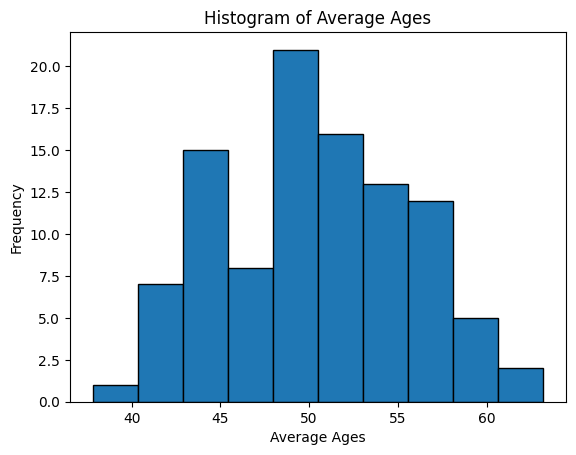

In [ ]:
plt.hist(ages, bins=10, edgecolor='black')

plt.xlabel('Average Ages')
plt.ylabel('Frequency')
plt.title('Histogram of Average Ages')

plt.show()